###### KNN Modeling


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

%matplotlib inline

In [59]:
import sklearn as sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.18.1.


###  Predict the diabetes status of a female patient given (label) their health measurements

- Attribute Information:

   -  pregnant -  Number of times pregnant 
   -  glucose  -  Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
   -  bp       -  Diastolic blood pressure (mm Hg) 
   -  skin     -  Triceps skin fold thickness (mm) 
   -  insulin  -  2-Hour serum insulin (mu U/ml) 
   -  bmi      -  Body mass index (weight in kg/(height in m)^2) 
   -  pedigree -  Diabetes pedigree function 
   -  age      -  Age (years) 
   -  diabetes - Class variable (0 or 1) 

In [60]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'diabetes']
pima_data = pd.read_csv('C:\\Users\\jp\\Desktop\\testData\\pima-indians-diabetes.csv', header=None, names=col_names)

In [61]:
pima_data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima_data.shape

(768, 9)

In [6]:
# pima_data summary
pima_data.info()   # 4 columns are numeric and 5th column is categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     768 non-null int64
bp          768 non-null int64
skin        768 non-null int64
insulin     768 non-null int64
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
diabetes    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Scikit-Learn data format to perform modeling
- predictors and response should be numpy arrays
- predictors and response are seperate object

In [7]:
# check the data type of iris_data
print(type(pima_data.glucose))  # note it is showing as pandas series that is nothing but numpy arrays.
print(type(pima_data.bmi))
print(type(pima_data.dtypes))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


### Machine Learning Models using Scikit Learn

- K-Nearest Neighbour classification Model
- steps in sckit-learn for model training and prediction



In [62]:
# seperate features x and resopnse y
x = pima_data[['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']]
y = pima_data['diabetes']

In [63]:
y.shape  # showing (150,) Response is 1-dim array for scikit learn modeling

(768,)

In [64]:
x.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [65]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

#### Scikit 6 steps process to build the predictibe model


In [66]:
#1: Import the model class that is gong to be used

# we are gong to use KNN Modeling
from sklearn.neighbors import KNeighborsClassifier

In [67]:
#2: Create the instance of the Model Estimator ( instantiate the model)
knn = KNeighborsClassifier()

In [68]:
print(knn)  # all the default parameters got set, we can speficify our own differrent parameters 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [69]:
#3: split the whole data into training and testing data
from sklearn.model_selection import train_test_split

# split train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1 )

In [70]:
#4:  train the model based on training data 
knn_fit = knn.fit(x_train,y_train)

In [71]:
#5: make predictions on the test data
y_pred = knn.predict(x_test)

In [20]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [73]:
comp_df = pd.DataFrame()
comp_df['Class_actual'] = y_test
comp_df['Class_predicted'] = y_pred
#comp_df[comp_df.Class_actual != comp_df.Class_predicted]
comp_df.head(20)

,Class_actual,Class_predicted
285,0,1
101,0,1
581,0,0
352,0,0
726,0,1
472,0,0
233,0,1
385,0,0
556,0,0
59,0,0


In [72]:
#6: Compare the predictied response(y_pred) vs actual response(y_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.744791666667


In [74]:
# Try with differrent values of K=1 to K=25 and record the testing accuracy
knn_range = list(range(1,26))
scores = []

for k in knn_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
#    scores.append(metrics.accuracy_score(y_test, y_pred))
    scores.append(format(metrics.accuracy_score(y_test, y_pred), '.2f'))

print(scores)

['0.76', '0.72', '0.74', '0.73', '0.74', '0.76', '0.77', '0.77', '0.76', '0.76', '0.76', '0.77', '0.79', '0.78', '0.78', '0.79', '0.79', '0.77', '0.79', '0.78', '0.78', '0.78', '0.77', '0.77', '0.77']


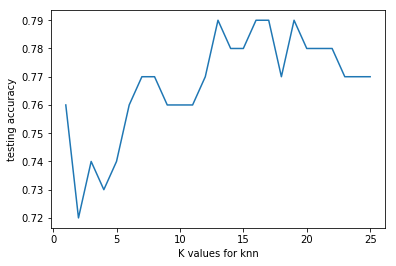

In [75]:
# plot the accuracy for diff K values
import matplotlib.pyplot as plt

# for allowing the plot to appear within the notebook
%matplotlib inline

plt.plot(knn_range, scores)
plt.xlabel('K values for knn')
plt.ylabel('testing accuracy')  # K=14 showing 79% accuracy

- as Model complexity increases, Training accuracy increses, that could lead to overfitting that will lead to low testing accuracy
- that could give very high-variance-estimate of out-of-sample accuracy
- K-fold cross validation overcome this limiation

In [26]:
#from sklearn.model_selection import cross_val_score

# Knn Model with K=14, 10 fold cross validation
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(x_train, y_train)

from sklearn import metrics
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))


0.78125


In [76]:
# KNN Model tuning Gridsearch
knn = KNeighborsClassifier()

param_grid = { "n_neighbors" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30] 
                }

optimized_knn = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5 )
optimized_knn.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [77]:
optimized_knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=22, p=2,
           weights='uniform')

In [78]:
optimized_knn.best_score_

0.73958333333333337

In [48]:
optimized_knn.grid_scores_

C:\Users\jp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.63368, std: 0.05922, params: {'n_neighbors': 1},
 mean: 0.70486, std: 0.01820, params: {'n_neighbors': 2},
 mean: 0.69792, std: 0.03994, params: {'n_neighbors': 3},
 mean: 0.70312, std: 0.01822, params: {'n_neighbors': 4},
 mean: 0.69965, std: 0.02298, params: {'n_neighbors': 5},
 mean: 0.70486, std: 0.02095, params: {'n_neighbors': 6},
 mean: 0.69792, std: 0.01921, params: {'n_neighbors': 7},
 mean: 0.71875, std: 0.02698, params: {'n_neighbors': 8},
 mean: 0.70139, std: 0.02964, params: {'n_neighbors': 9},
 mean: 0.71528, std: 0.02992, params: {'n_neighbors': 10},
 mean: 0.71701, std: 0.03920, params: {'n_neighbors': 11},
 mean: 0.72917, std: 0.02504, params: {'n_neighbors': 12},
 mean: 0.73438, std: 0.01659, params: {'n_neighbors': 13},
 mean: 0.73785, std: 0.02641, params: {'n_neighbors': 14},
 mean: 0.73090, std: 0.01678, params: {'n_neighbors': 15},
 mean: 0.72222, std: 0.02971, params: {'n_neighbors': 16},
 mean: 0.71875, std: 0.02938, params: {'n_neighbors': 17},
 mean:

In [79]:
# Knn Model with K=22, 10 fold - Final model validation
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(x_train, y_train)

from sklearn import metrics
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.78125


In [80]:
# distribution of response class in test data
y_test.value_counts()

0    123
1     69
Name: diabetes, dtype: int64

In [81]:
# praportion of response class in test data
y_test.value_counts().head(2)/ len(y_test)

0    0.640625
1    0.359375
Name: diabetes, dtype: float64

- classification accuracy is the easiest way to understand the classification accuracy
- but it does not tell the complete details about classification erros

##### Confusion Metrics : describe the performance of the Model

In [35]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [36]:
print(confusion_matrix( y_test, y_pred))

[[115   8]
 [ 34  35]]


- Basic terminology
    - True Positives (TP): correctly predicted that they do have diabetes
    - True Negatives (TN): correctly predicted that they don't have diabetes
    - False Positives (FP): incorrectly predicted that they do have diabetes (a "Type I error")
    - False Negatives (FN): incorrectly predicted that they don't have diabetes (a "Type II error")

In [82]:
# save confusion matrix 
confusion = metrics.confusion_matrix(y_test, y_pred)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

print("TN - ", TN)
print("FP - ", FP)
print("FN - ", FN)
print("TP - ", TP)

TN -  115
FP -  8
FN -  34
TP -  35


- Confusion matrix give us the complete picture how Classifier is performing
- Which Metrics should be used will depend on the business objective

- Example:

- Fraud txn detector (positive class is 'fraud'):
    - FP :  predicting as 'fraud' for 'non-fraud' txn
    - FN :  predicting as 'non-fraud' for fraud txn 
    
    - in this case FP(normal txn that is flagged as possbile fraud)  would be more acceptable than FN (fradulent txn is flagged       as normal txn):
    - in this case focus should be more reducing the FN and increasing the TP : optimize the sensitivity for higher %
    
 - Spam Filter ( positive class is 'spam'):  in this case focus should be more reducing the FP and increasing the TN 

In [84]:
# Classification Accuracy : 

print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.78125
0.78125


In [85]:
# Sensitivity(True positive Rate) : when the actual value is positive, how often the prediction correct 
# Sensitivity = TP / (TP + FN)

print(TP / (TP + FN))
print(metrics.recall_score(y_test, y_pred))

0.507246376812
0.507246376812


In [40]:
# Precision: When a positive value is predicted, how often is the prediction correct
#    How precise is the classifier when predicting positive instances

print(TP / (TP + FP))
print(metrics.precision_score(y_test, y_pred))

0.813953488372
0.813953488372


In [41]:
# False Positive Rate : when actual value is negative, how often the prediction incorrect
print(FP/(FP + TN))

0.0650406504065


In [42]:
# Specificity( 1 - FPR)  : when the actual value is negative, how often the prediction correct 
print( TN/ (TN + FP) )

0.934959349593


### ROC Curver and Area under Curve (AUC) : 
- provide the sensitivity and specificity values for differrent threshold values without actually changing the threshold.
- ROC will help to choosing the threshold that balance the sensitivity and specificity

In [86]:
print(metrics.roc_auc_score(y_test, y_pred))

0.721102863203


In [87]:
y_pred_prob = knn.predict_proba(x_test)
y_pred_prob

array([[ 0.40909091,  0.59090909],
       [ 0.59090909,  0.40909091],
       [ 0.81818182,  0.18181818],
       [ 0.81818182,  0.18181818],
       [ 0.54545455,  0.45454545],
       [ 0.72727273,  0.27272727],
       [ 0.5       ,  0.5       ],
       [ 0.90909091,  0.09090909],
       [ 0.81818182,  0.18181818],
       [ 0.68181818,  0.31818182],
       [ 0.59090909,  0.40909091],
       [ 0.86363636,  0.13636364],
       [ 0.31818182,  0.68181818],
       [ 0.36363636,  0.63636364],
       [ 0.90909091,  0.09090909],
       [ 0.40909091,  0.59090909],
       [ 0.81818182,  0.18181818],
       [ 0.63636364,  0.36363636],
       [ 0.59090909,  0.40909091],
       [ 1.        ,  0.        ],
       [ 0.59090909,  0.40909091],
       [ 0.95454545,  0.04545455],
       [ 0.36363636,  0.63636364],
       [ 0.59090909,  0.40909091],
       [ 0.95454545,  0.04545455],
       [ 0.63636364,  0.36363636],
       [ 0.54545455,  0.45454545],
       [ 0.27272727,  0.72727273],
       [ 0.86363636,

In [48]:
comp_df['prob_1'] = y_pred_prob[:,1]
comp_df.head(10)

,Class_actual,Class_predicted,prob_1
285,0,1,0.590909
101,0,0,0.409091
581,0,1,0.181818
352,0,0,0.181818
726,0,0,0.454545
472,0,0,0.272727
233,0,0,0.500000
385,0,1,0.090909
556,0,0,0.181818
59,0,1,0.318182


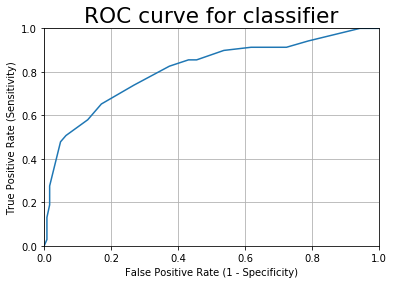

In [88]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 18
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- AUC is the percentage of the ROC plot that is underneath the curve:
- AUC is useful as a single number summary of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will   
   assign a higher predicted probability to the positive observation.

In [50]:
df_threshold = pd.DataFrame()
df_threshold['tpr'] = tpr
df_threshold['fpr'] = fpr
df_threshold['prob'] = thresholds  # probability(1)
df_threshold.head(60)

,tpr,fpr,prob
0,0.000000,0.000000,1.818182
1,0.028986,0.008130,0.818182
2,0.072464,0.008130,0.772727
3,0.130435,0.008130,0.727273
4,0.188406,0.016260,0.681818
5,0.275362,0.016260,0.636364
6,0.478261,0.048780,0.590909
7,0.507246,0.065041,0.545455
8,0.579710,0.130081,0.500000
9,0.652174,0.170732,0.454545


In [51]:
# AUC suggest the best threshold - tpr=.82, fpr=.27, thresold = .36

In [52]:
# prediction class based on default threshold prob = 0.5
df_prediction = pd.DataFrame()
df_prediction['actual_class'] = y_test
df_prediction['pred_class'] = y_pred
df_prediction['prob_1'] = y_pred_prob[:,1]
df_prediction.head(10)

,actual_class,pred_class,prob_1
285,0,1,0.590909
101,0,0,0.409091
581,0,0,0.181818
352,0,0,0.181818
726,0,0,0.454545
472,0,0,0.272727
233,0,0,0.500000
385,0,0,0.090909
556,0,0,0.181818
59,0,0,0.318182


In [90]:
# prediction class based on new threshold prob = 0.36
df_prediction.loc[df_prediction['prob_1'] >=.36, 'pred_class_new'] = '1'
df_prediction.loc[df_prediction['prob_1'] <.36, 'pred_class_new'] = '0'
df_prediction['pred_class_new'] = df_prediction['pred_class_new'].astype(int)
df_prediction.head(10)

,actual_class,pred_class,prob_1,pred_class_new
285,0,1,0.590909,1
101,0,0,0.409091,1
581,0,0,0.181818,0
352,0,0,0.181818,0
726,0,0,0.454545,1
472,0,0,0.272727,0
233,0,0,0.500000,1
385,0,0,0.090909,0
556,0,0,0.181818,0
59,0,0,0.318182,0


In [91]:
# accuracy at threshold=.5
print( 'accuracy = ' , metrics.accuracy_score(df_prediction.actual_class, df_prediction.pred_class))
print( 'sensitivity(tpr) = ' , metrics.recall_score(df_prediction.actual_class, df_prediction.pred_class))
print( 'precision = ' , metrics.precision_score(df_prediction.actual_class, df_prediction.pred_class))

accuracy =  0.78125
sensitivity(tpr) =  0.507246376812
precision =  0.813953488372


In [92]:
# accuracy at threshold=.36
print( 'accuracy = ' , metrics.accuracy_score(df_prediction.actual_class, df_prediction.pred_class_new))
print( 'sensitivity(tpr) = ' , metrics.recall_score(df_prediction.actual_class, df_prediction.pred_class_new))
print( 'precision = ' , metrics.precision_score(df_prediction.actual_class, df_prediction.pred_class_new))

accuracy =  0.697916666667
sensitivity(tpr) =  0.826086956522
precision =  0.553398058252
